# Rob Lisy

Data Science 410 - Assignment 1

You will use uni-variate visualization methods and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find three interesting relationships within the variables that help you understand the energy efficiency of these buildings.

In [2]:
from os import path
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import matplotlib.pyplot as plt

filename = f"EnergyEfficiencyData.csv"

# This data set is adult income by the US Census Bureau
# Hosted at UC Irvine at the URL here:
# https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

def download_if_not_exists(URL: str, filename: str):
    """
    Helper function to download the file at the URL if it doesn't already exist
    :param URL: A string with the URL location
    :param filename: The file name on disk
    """
    
    if path.exists(f"{filename}"):
        return
    else:
        req = requests.get(URL)
        url_content = req.content
        csv_file = open(f"{filename}", 'wb')
        csv_file.write(url_content)
        csv_file.close()
    return

download_if_not_exists("https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv",
                      filename)
                        
# import the CSV as a data set
df = pd.read_csv(filename, header=0)
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
# Check to see if we have any column conversions we need to do.
df.dtypes
# whoa! all numeric!

Relative Compactness         float64
Surface Area                 float64
Wall Area                    float64
Roof Area                    float64
Overall Height               float64
Orientation                    int64
Glazing Area                 float64
Glazing Area Distribution      int64
Heating Load                 float64
Cooling Load                 float64
dtype: object

In [10]:
# any missing values?
df.isnull().values.any()
# none!

False

In [4]:
# Very first thing, describe the columns. This gets you basic stats info (quartiles, std deviations)
df.describe()

# things I learn from .describe()
# - these variables have different scales (ex - orientation is 2-5, Glazing Area is 0-.4)
# - I'm super curious about the underlying distributions of these variables (let's plot them next)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


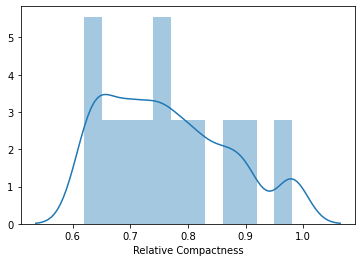

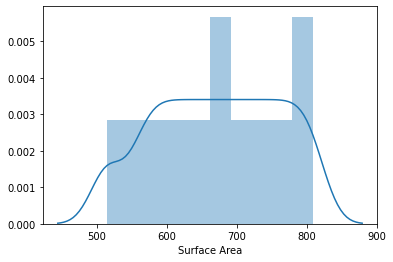

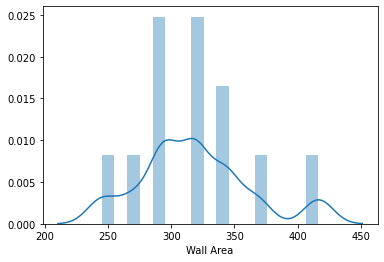

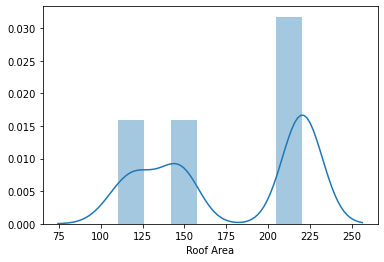

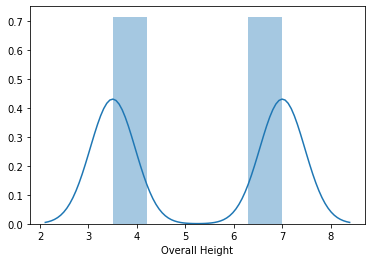

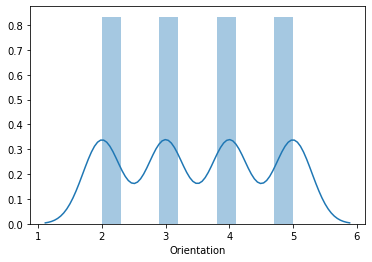

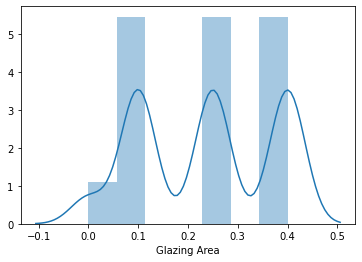

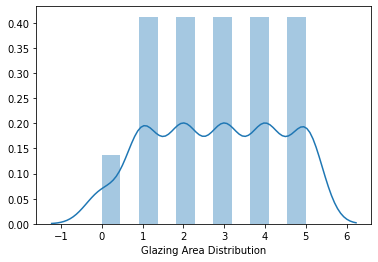

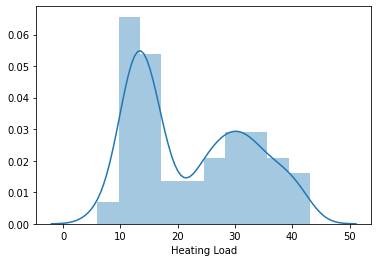

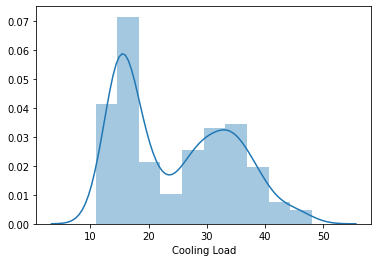

In [5]:
# Plot the distribution for each column

for c in df.columns:
    sns.distplot(df[c])
    plt.show();

In [ ]:
# interesting things I've learned so far:
# - orientation may really be a categorical variable, coded as numeric. boo.
# - heating load / cooling load look to be bimodal
# - overall height... what's going on there? only 2 values?

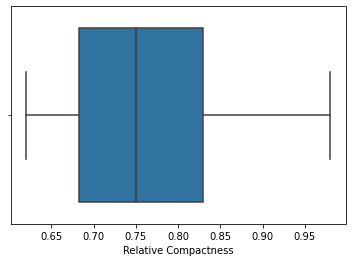

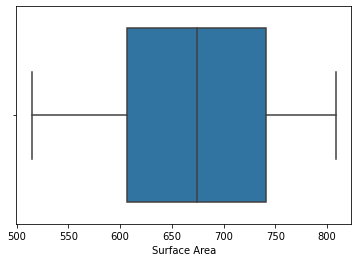

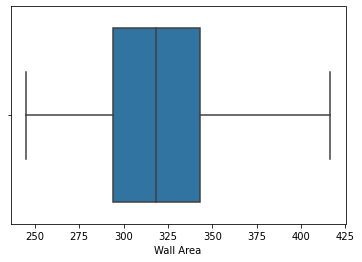

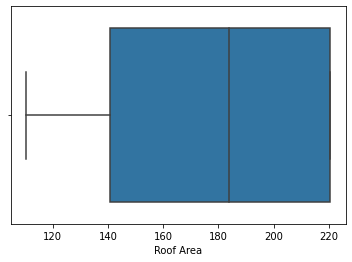

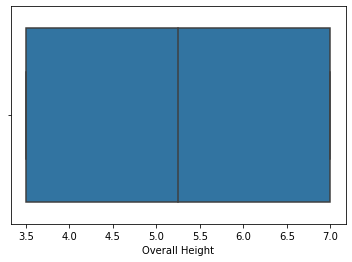

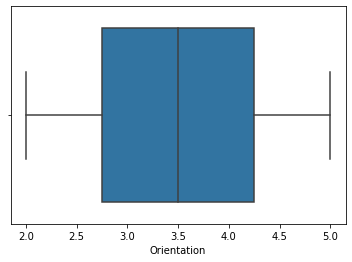

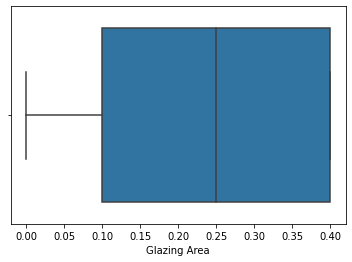

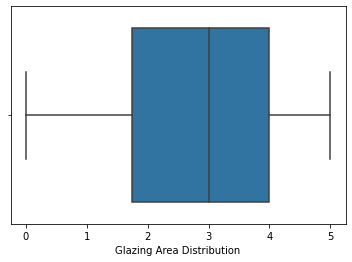

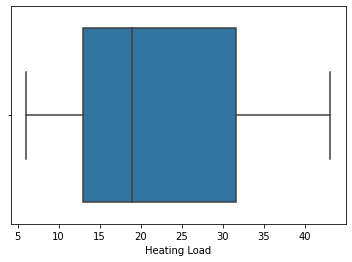

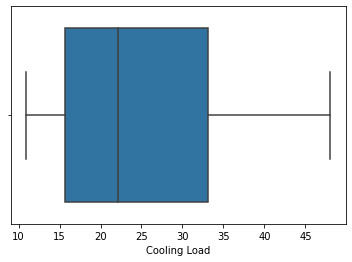

In [6]:
# Let's look at some box plots, with heating load and orientation as interesting dimensions
for c in df.columns:
    sns.boxplot(df[c], hue = df['Heating Load'])
    plt.show()


### So at this point I'm thinking we need to explore interaction terms. I'm conflicted here though, because the instructions say only univariate graphs. I'm going to note that I've read the instructions, but that I also feel that interactions are the right next step

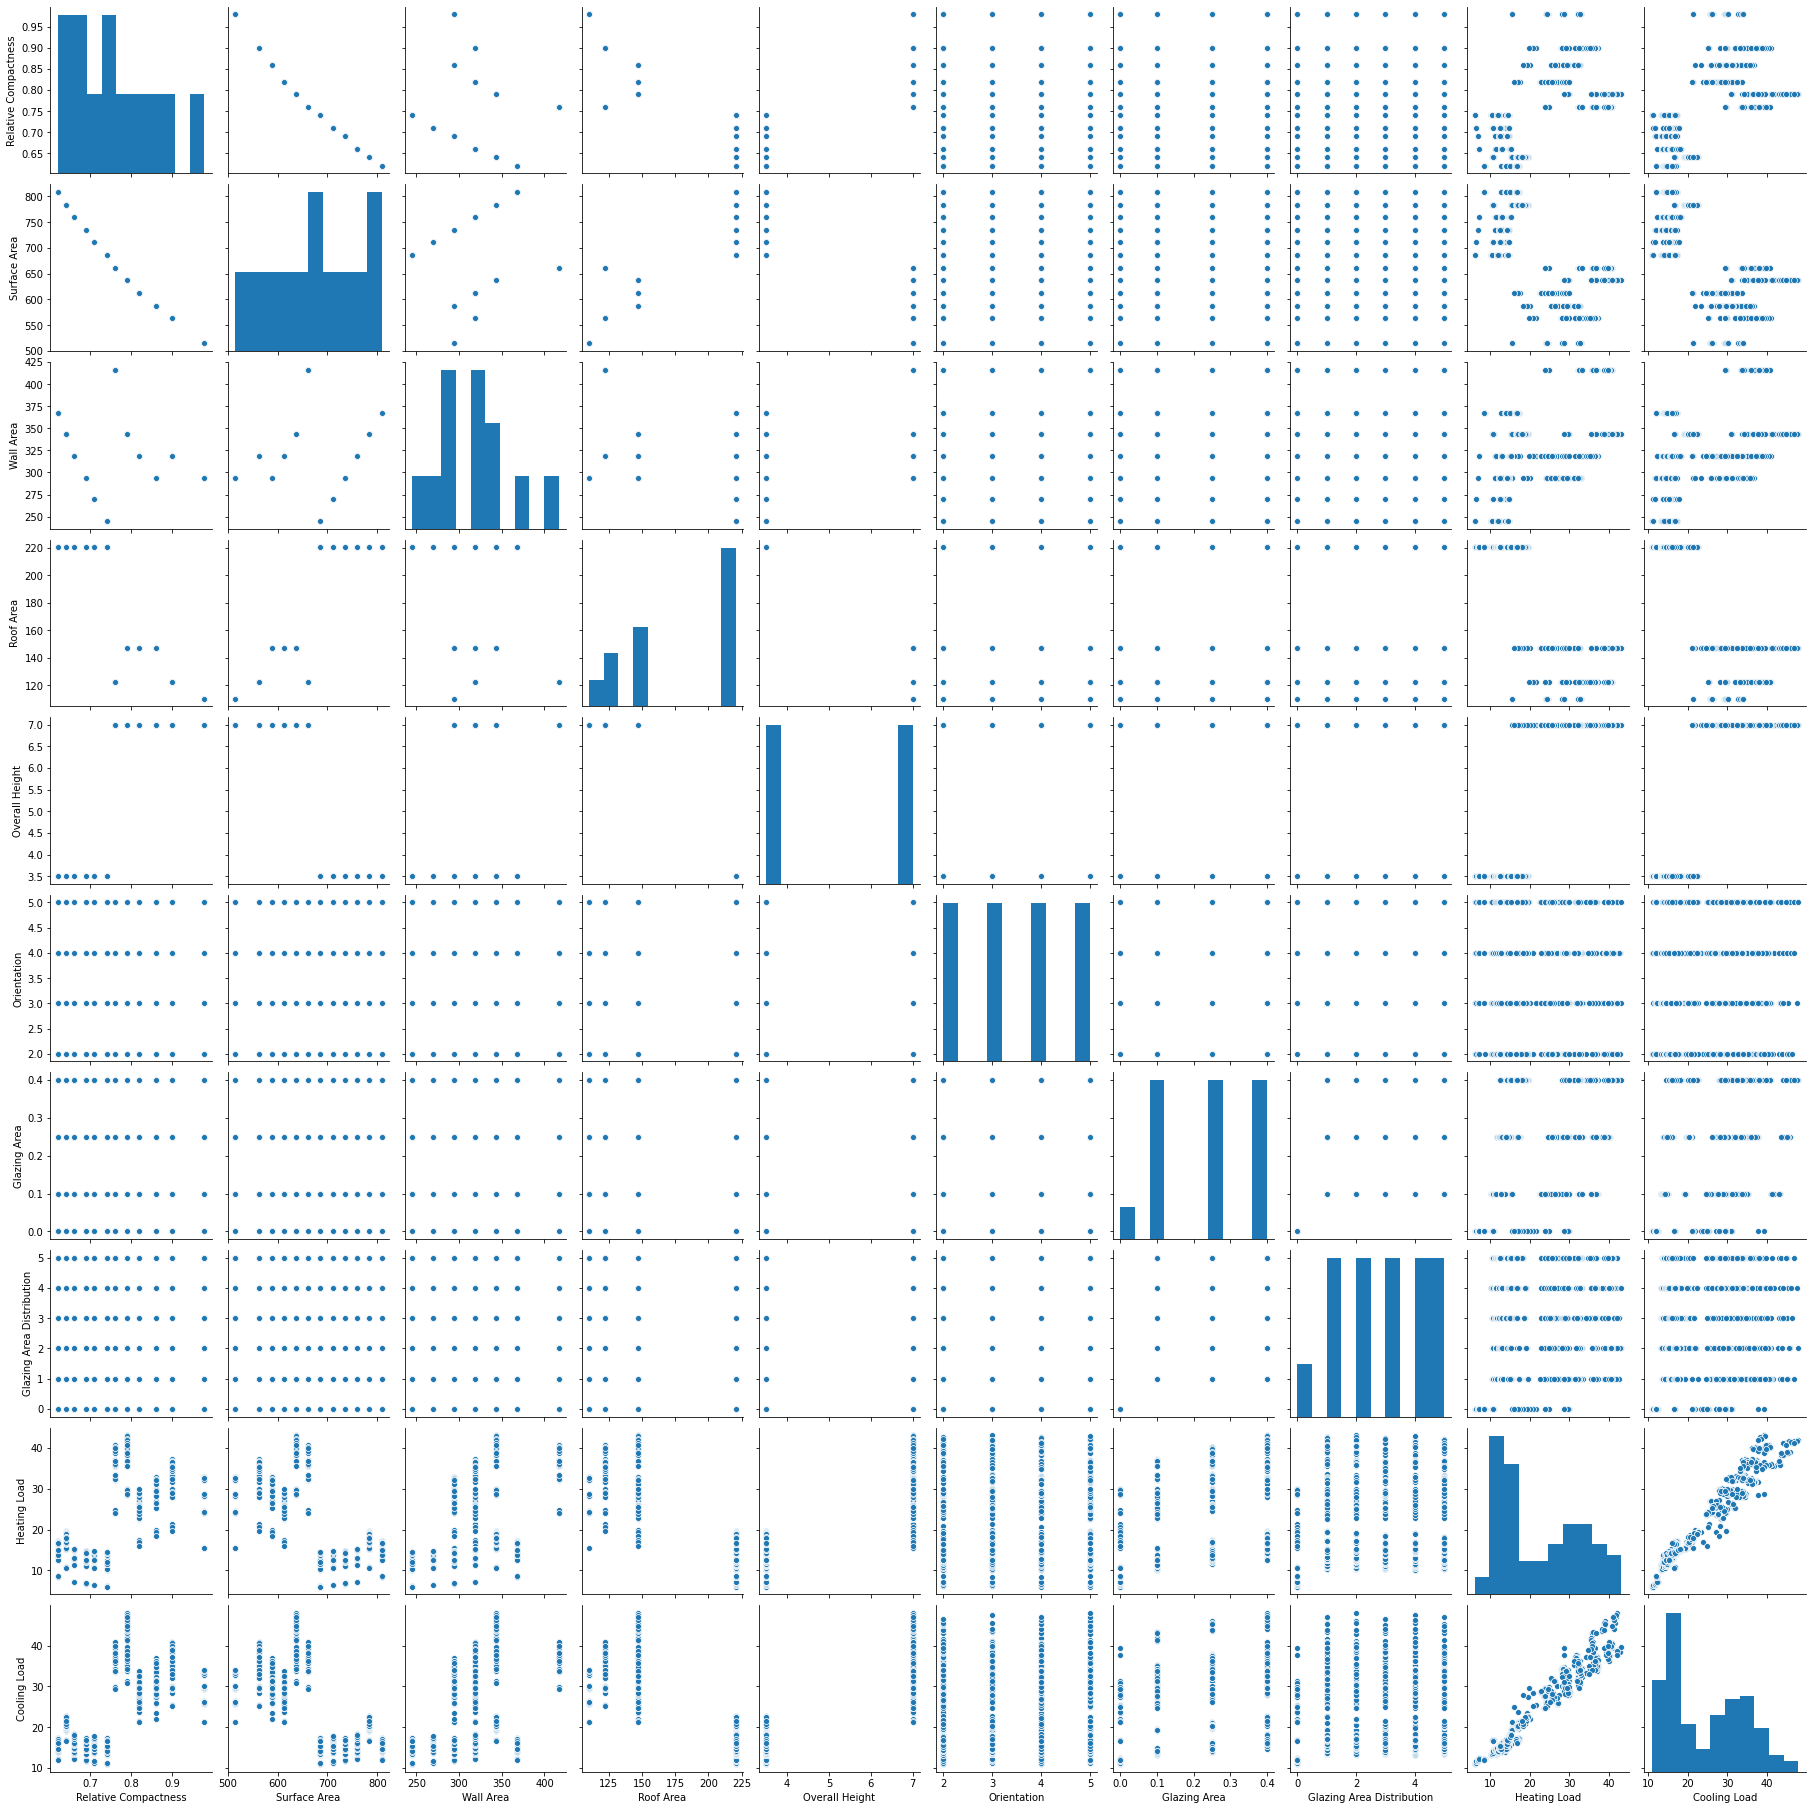

In [7]:
sns.pairplot(df);

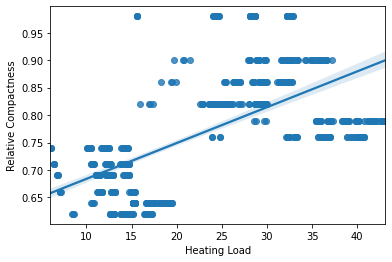

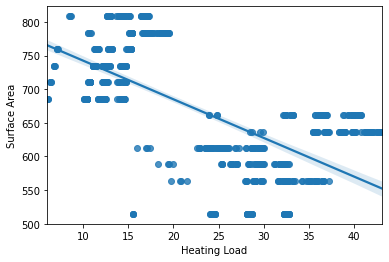

In [13]:
# Looks like there's relationships between:
# - heating load & surface area
# - heating load & relative compactness

# Let's look at those 2 relationships explicitly
sns.regplot(df['Heating Load'], df['Relative Compactness']);
plt.show()
sns.regplot(df['Heating Load'], df['Surface Area']);
plt.show()

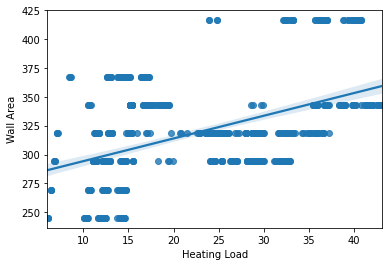

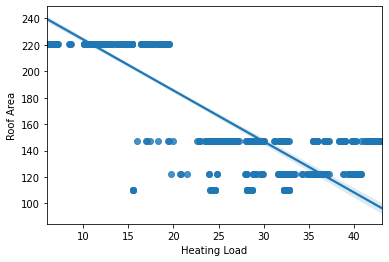

In [16]:
# Let's look at the wall area (I'd expect it to increase along with heating load)
sns.regplot(df['Heating Load'], df['Wall Area']);
plt.show()
sns.regplot(df['Heating Load'], df['Roof Area']);
plt.show()

## Summary


There's a few interesting relationships with heating load:
- roof area has a negative correlation with heating load
- wall area has a positive correlation with heating load
- surface area has a negative correlation with heating load
- relative compactness has a positive correlation with heating load

We'd have to explore more to see if these are informative in a regression model. Maybe make a GLM?